In [35]:
# import dataset

from keras.datasets import mnist
import matplotlib.pyplot as plt

In [36]:
train, test= mnist.load_data()
x_train, y_train= train
x_test, y_test= test

In [37]:
# model

from keras.models import Sequential
from keras.layers import Dense

# latent_rep_size is the number of nodes in the hidden layer which is a hyperparameter

latent_rep_size=1
def auto_encoder(latent_rep_size):
    model= Sequential()
    model.add( Dense( units= latent_rep_size, input_shape= (784,), activation= 'relu'))
    model.add(Dense(units=784, activation= 'sigmoid'))
    return model

In [38]:
model= auto_encoder(latent_rep_size)

### Data Preprocessing

In [39]:
# reshaping the size from 28*28 to 784*1

x_train= x_train.reshape((x_train.shape[0], x_train.shape[1]*x_train.shape[2]))
x_test= x_test.reshape((x_test.shape[0], x_test.shape[1]*x_test.shape[2]))

In [40]:
# normalizing the values between 0 and 1 by dividing them with 255

x_train= x_train/255
x_test= x_test/255

### Training

x_train must be given as both input and output as the objective is to produce an output, which is similar to the input.

In [41]:
model.compile(optimizer='adam', loss= 'mean_squared_error')
model.fit(x_train, x_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0751
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0653
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0641
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0635
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0632
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0629
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0624
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0620
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0616
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0613


In [42]:
output= model.predict(x_test)

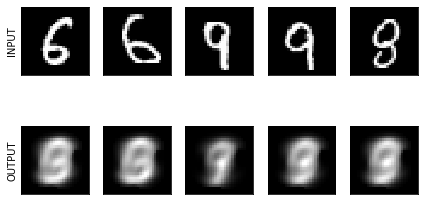

In [43]:
# selecting 5 random images and plot their respective input and output

import random
fig, ((i1, i2, i3, i4, i5), (i6, i7, i8, i9, i10)) = plt.subplots(2, 5)
randomly_selected_imgs = random.sample(range(output.shape[0]),5)

  # 1st row for original images
for i, ax in enumerate((i1,i2,i3,i4,i5)):
        ax.imshow(x_test[randomly_selected_imgs[i]].reshape(28,28), cmap='gray')
        if i == 0:
              ax.set_ylabel("INPUT")
        ax.grid(False)
        ax.set_xticks([])
        ax.set_yticks([])
        
for i, ax in enumerate((i6,i7,i8,i9,i10)):
    ax.imshow(output[randomly_selected_imgs[i]].reshape(28,28), cmap='gray')
    if i == 0:
        ax.set_ylabel("OUTPUT")
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
plt.tight_layout()
plt.show()


### Understanding the performance by tweaking the number of nodes in the hidden layer.

In [44]:
# model with 2 nodes in hidden layer

model_2= auto_encoder(latent_rep_size=2)
model_2.compile(optimizer='adam', loss= 'mean_squared_error')
model_2.fit(x_train, x_train, epochs=10, verbose= 0)

In [45]:
# model with 4 nodes in hidden layer

model_4= auto_encoder(latent_rep_size=4)
model_4.compile(optimizer='adam', loss= 'mean_squared_error')
model_4.fit(x_train, x_train, epochs=10, verbose= 0)

In [46]:
# model with 8 nodes in hidden layer

model_8= auto_encoder(latent_rep_size=8)
model_8.compile(optimizer='adam', loss= 'mean_squared_error')
model_8.fit(x_train, x_train, epochs=10, verbose= 0)

In [47]:
# model with 16 nodes in hidden layer

model_16= auto_encoder(latent_rep_size=16)
model_16.compile(optimizer='adam', loss= 'mean_squared_error')
model_16.fit(x_train, x_train, epochs=10, verbose= 0)

In [48]:
# model with 32 nodes in hidden layer

model_32= auto_encoder(latent_rep_size=32)
model_32.compile(optimizer='adam', loss= 'mean_squared_error')
model_32.fit(x_train, x_train, epochs=10, verbose= 0)

In [49]:
output_2= model_2.predict(x_test)
output_4= model_4.predict(x_test)
output_8= model_8.predict(x_test)
output_16= model_16.predict(x_test)
output_32= model_32.predict(x_test)

In [50]:
ops= [x_test, output, output_2, output_4, output_8, output_16, output_32]

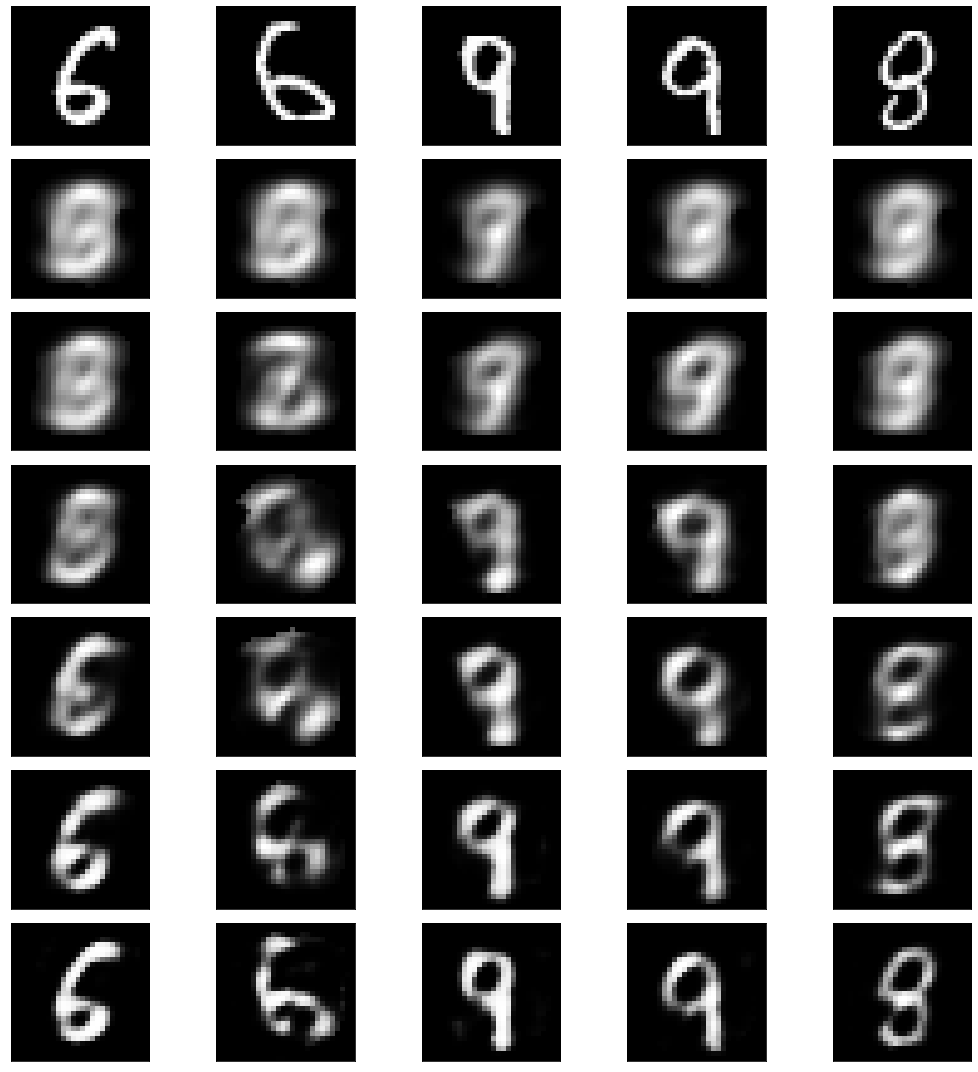

In [51]:
fig, axes= plt.subplots(7,5, figsize= (15,15))
for r_no, r in enumerate (axes):
    for c_n, ax in enumerate (r):
        ax.imshow(outputs[r_no] [randomly_selected_imgs[c_n]].reshape(28,28), cmap='gray')
        ax.grid(False)
        ax.set_xticks([])
        ax.set_yticks([])
plt.tight_layout()
plt.show()